# Window Size
## The main purpose of this notebook is to experiment with different window sizes on finding anomalies

In [75]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model, load_model
import seaborn as sns
import datetime

import os.path

from importlib import reload

from utils import *
from autoencoder import AutoEncoder

In [80]:
%reload_ext autoreload
# %aimport utils
# %aimport autoencoder
%autoreload 2

In [56]:
# Import preprocessed data
file_path = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/'
DIAGRAM_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/'

In [57]:
file_version = 'ws20num2derFalse'
sensors = ['left_angle', 'right_angle'] #'back_angle', 
file_name = f'{file_version}-control.npy'
path = file_path + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (12022, 20, 2)


In [58]:
# Retrieve data and place with pd dataframe
patient_file_path = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/patient/patient_data.csv'
dataframe = pd.read_csv(patient_file_path, parse_dates=['datetime'])
df = dataframe.loc[:,sensors]
df.loc[:,'Date'] = pd.to_datetime(dataframe.loc[:,'datetime'])

# Split test and train data
train, test = df.loc[df['Date'] <= '2011-12-01 11:38:00'], df.loc[df['Date'] > '2011-12-01 11:38:00']
train

,left_angle,right_angle,Date
0,0.572584,0.215395,2011-12-01 11:04:05.000
1,0.568733,0.200416,2011-12-01 11:04:05.050
2,0.564883,0.200416,2011-12-01 11:04:05.100
3,0.557181,0.201110,2011-12-01 11:04:05.150
4,0.541779,0.200416,2011-12-01 11:04:05.200
...,...,...,...
38182,0.276088,0.527046,2011-12-01 11:35:54.100
38183,0.276088,0.525659,2011-12-01 11:35:54.150
38184,0.276088,0.524272,2011-12-01 11:35:54.200
38185,0.276088,0.524272,2011-12-01 11:35:54.250


In [59]:
compress = 0.4
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_two = int(units_one * 0.5)
print(f"1st layer units: {units_one}, 2nd layer units: {units_two}")

1st layer units: 16, 2nd layer units: 8


In [60]:
twen_time_code = '16300_0421'
twen_model_file = f'{twen_time_code}-model.h5'
twen_model_file

'16300_0421-model.h5'

Double layer model built
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 20, 16)            1216      
_________________________________________________________________
dropout_26 (Dropout)         (None, 20, 16)            0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 8)                 800       
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 20, 8)             0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 20, 8)             544       
_________________________________________________________________
lstm_55 (LSTM)               (None, 20, 16)            1600      
_________________________________________________________________
dropout_27 (Dropout)        

<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

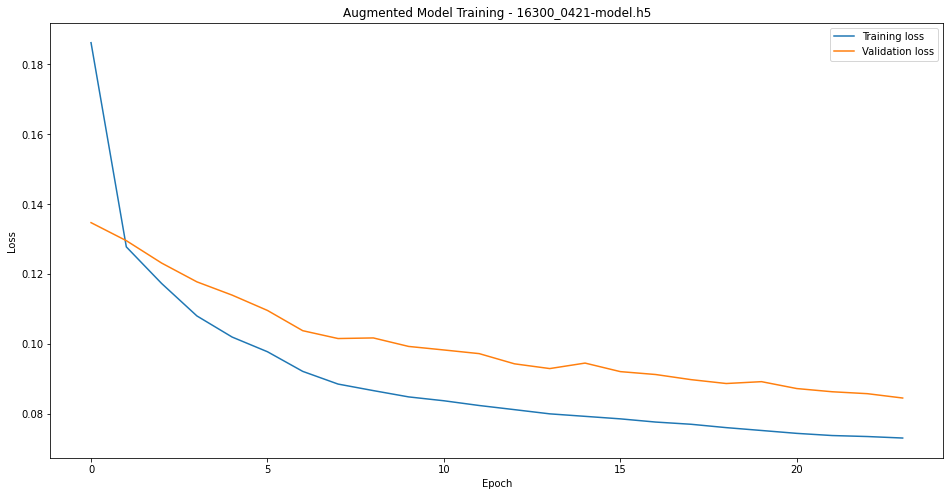

In [77]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=2, min_delta=1e-3)
WZ_twenty = AutoEncoder(units_one, units_two, trainX, twen_model_file, callback)

# Show the history of loss
history_plot_and_save(WZ_twenty.history, twen_model_file, DIAGRAM_FILE_PATH)


In [81]:
callback = EarlyStopping(monitor='loss', patience=2, min_delta=1e-3)
WZ_twenty_copy = AutoEncoder(units_one, units_two, trainX, twen_model_file, callback)

Checking for /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/16300_0421-model.h5

Double layer model built
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 20, 16)            1216      
_________________________________________________________________
dropout_30 (Dropout)         (None, 20, 16)            0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 8)                 800       
_________________________________________________________________
repeat_vector_15 (RepeatVect (None, 20, 8)             0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 20, 8)             544       
_________________________________________________________________
lstm_63 (LSTM)               (None, 20, 16)     

KeyboardInterrupt: 